In [5]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                                #importing matplotlib for plotting graphs
from sklearn.datasets import load_breast_cancer                # importing the cancer dataset

### K- Nearest- Neighbor Algorithm 

In [6]:
from sklearn.neighbors import KNeighborsClassifier  # importing the algorithm for training the model
from sklearn.model_selection import train_test_split # importing model_selection for training and testing data split.


cancer = load_breast_cancer()  #loading the dataset into a variable


In [7]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [8]:
print(cancer.feature_names)                                    #prints the features that describe each data object of the dataset
print(cancer.target_names)                                     #prints the class labels associated with each data object

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [9]:
cancer.data.shape 

(569L, 30L)

For KNN we follow the steps below.
1. train the dataset 
2. while trying to make the prediction for the new sample the classifier only looks at its closest k-poinsts. K-defines the number of neighboring points.
3. By defaul it using 5 points to make prediction

In [10]:
import mglearn # Helper functions for the book 'Introduction to machine learning with Python' 

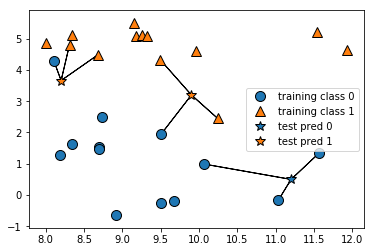

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)       #generally uses 5 neighbors, but here we secify..

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)   
#splitting the dataset into training and testing **random_state signigies that we always get the same split 
#so the accuracy remains the same every time the cell is reproduced

knn = KNeighborsClassifier() #assigning a variable to the classifier(basicaly making a constructor)
knn.fit(X_train, y_train)    #the fit method fits the training dataset for the model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
print('Accuracy of KNN n=5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))     
#evaluating the accuracy of the model for the training dataset

Accuracy of KNN n=5, on the training set: 0.946


In [14]:
print('Accuracy of KNN n=5, on the training set: {:.3f}'.format(knn.score(X_test, y_test)))     
#evaluating the accuracy of the model for the test dataset

Accuracy of KNN n=5, on the training set: 0.930


In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

[1.0, 0.97652582159624413, 0.95774647887323938, 0.95539906103286387, 0.94835680751173712, 0.9460093896713615, 0.94366197183098588, 0.94131455399061037, 0.93427230046948362, 0.93896713615023475]
[0.90209790209790208, 0.88811188811188813, 0.92307692307692313, 0.92307692307692313, 0.92307692307692313, 0.93706293706293708, 0.93006993006993011, 0.93006993006993011, 0.91608391608391604, 0.91608391608391604]


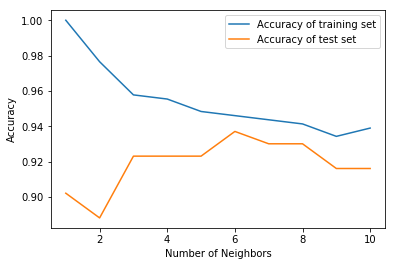

In [16]:
training_accuracy = []          #two lists defined to store 20 accuracy values each off training and testing dataset which will be appended in the loop
test_accuracy = []

neighbors_setting = range(1,11)      #setting the value of this variable from 1-10



for n_neighbors in neighbors_setting:                                         #looping 10 times for 10 different accuracy values
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)                                              #declaring the classifier
    clf.fit(X_train, y_train)                                                 #fitting the classifier model
    training_accuracy.append(clf.score(X_train, y_train))                     #append the accuracy value to the lists 
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_setting, training_accuracy, label='Accuracy of training set')        #plotting of these values with y-axis showing accuracy values and x-axis showing number of neighbors. 
plt.plot(neighbors_setting, test_accuracy, label='Accuracy of test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

print(training_accuracy)
print(test_accuracy)

In [38]:
#by looking at plot, best result accurs when n_neighbors is 6

In [39]:
print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))

Accuracy of the training set for 6NN: 0.946009
Accuracy of the test set for 6NN: 0.937063


### Decision Tree

Decision trees are hierarchies of if else questions and that ultimately leads to the decision making depending on the depth of branching as well as on some other parameters. 

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [18]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [19]:
tree = DecisionTreeClassifier(random_state=0) # instantiate the random_state with 0
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [20]:
print('Accuracy of training subset: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of test subset: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of training subset: 1.000
Accuracy of test subset: 0.937


Here we got an accuracy of 100% which is more. This is happening because the decision tree is unrestricted. So to restrict the jumps we can apply a decision tree concept which is called "Pruning". 

In [21]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0) # restricting the maximum depth
tree.fit(X_train, y_train)
print('Accuracy of training subset: {:.3f}'.format(tree.score(X_train,y_train)))
print('Accuracy of test subset: {:.3f}'.format(tree.score(X_test,y_test)))

Accuracy of training subset: 0.988
Accuracy of test subset: 0.951


In [22]:
import graphviz
from sklearn.tree import export_graphviz ## used to export the tree

export_graphviz(tree,out_file='C:\Users\Nikitha\Downloads\mytree.dot',class_names=['malignant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)

In [42]:
%%cmd 
dot -Tpng mytree.dot -o mytree.png

Microsoft Windows [Version 10.0.16299.64]
(c) 2017 Microsoft Corporation. All rights reserved.

(C:\Users\Nikitha\Anaconda2) C:\Users\Nikitha\big-data-python-class\Homeworks\Project>dot -Tpng mytree.dot -o mytree.png

(C:\Users\Nikitha\Anaconda2) C:\Users\Nikitha\big-data-python-class\Homeworks\Project>

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [43]:
print('Feature importances: {}'.format(tree.feature_importances_)) # Shows how much weight each feature carries for decision making.
# 0 - not used for decision making process
# 1 - used for decision making process
print(type(tree.feature_importances_))

Feature importances: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]
<type 'numpy.ndarray'>


In [25]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


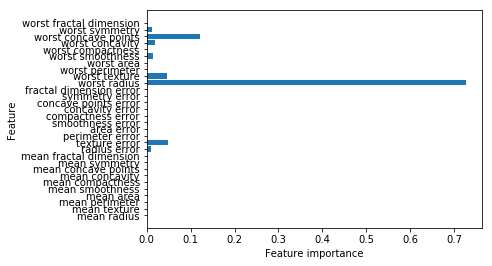

In [26]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [44]:
# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set becomes huge
# but the accuracy for test set decrease

# by looking at plot, best result accurs when max_depth is 3

## Neural Network

A multilayer perceptron (MLP) is a class of  neural network which consists of at least three layers of nodes. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. 

In [28]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.906
acc for test data: 0.881


Accuracy is low compared to other algorithm due the unscaled data.

In [29]:
print('The max per each feature:\n{}'.format(cancer.data.max(axis=0)))

The max per each feature:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [31]:
#1- Scaling X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # Standardization centeres the features around a mean of zero.
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

acc for training data: 0.995
acc for test data: 0.958


In [32]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [33]:
#2- change alpha
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled,y_train)
print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

acc for training data: 0.988
acc for test data: 0.972


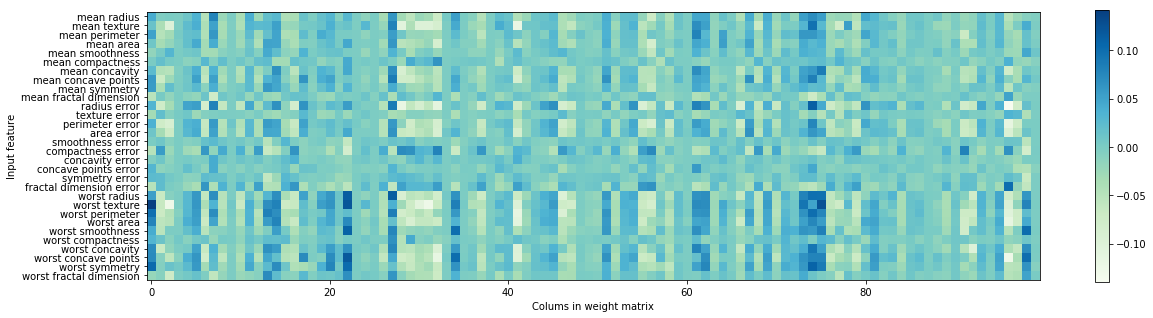

In [34]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Colums in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [35]:
# by looking at the heatmap it seems as from "smoothness error" till "fractal dimention error" does not play a huge role, 
# also "mean smoothness"

In [36]:

# NN can get better result in larger datasets
# we can tune a lot of parameter
# but data may need pre-processing

#other library for NN:
# theano
# keras
# tensorflow

Sources : 

https://en.wikipedia.org/wiki/Machine_learning#Artificial_neural_networks


https://en.wikipedia.org/wiki/Multilayer_perceptron


http://research.ijcaonline.org/volume83/number5/pxc3892604.pdf

http://www.sci.csueastbay.edu/~esuess/classes/Statistics_6620/Presentations/ml4/kNN_disgnosing_breast_cancer.html#/
